#  Exploratory Data Analysis for Haberman Dataset
## What is the Dataset about?
Dataset contains cases  from a study that was conducted between 1958 and 1970 at the **University of Chicago's Billings Hospital** on the _survival_ of patients who had undergone surgery for breast cancer.

In [1]:
# Importing Necssary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
haberman=pd.read_csv("haberman.csv")
# Renaming Columns for Readabilty
haberman.columns=['age','op_year','pos_axil_nodes_det','survival_stat']
haberman

,age,op_year,pos_axil_nodes_det,survival_stat
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1
5,33,60,0,1
6,34,59,0,2
7,34,66,9,2
8,34,58,30,1
9,34,60,1,1


## Descritption
 1. There are 305 data points to consider
 2. The 'age' column tells the age of the patient when he/she was operated
 3. The 'op_year' column tells about the year of opeartion as last two digits from 1900
 4. The 'pos_axil_nodes_det' shows the number of positive axillary nodes detected in a patient's body. When we say positve, it means the node is cancerous
 5. Hence there are three attributes in the dataset to consider
 6. The last column to consider is 'survival_stat' which is a class label:
   - 1-> indicates patient who surived for 5 years or longer
   - 2-> indicates patient who unfortuantely died within 5 years
 7. Simply looking at the dataset reveals that all attributes are numeric
 
## Obejctive
Our objective is to understand the factors/attributes presented in the dataset which affects the survivability of a patient post surgery and hence attempt to build a classification model based on our findings.

In [3]:
#Few higher level stats
haberman.describe()

,age,op_year,pos_axil_nodes_det,survival_stat
count,305.000000,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066,1.265574
std,10.744024,3.254078,7.199370,0.442364
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,61.000000,66.000000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


#### Observations:
  1. Average age around which person undergone a surgery for breast cancer is around 52
  2. The value of age ranges from 30 to 83
  3. 75% of case have less than equal to 4 positive auxillary nodes.
  4. There seems to be a correlation between survival_stat and pos_axill_nodes_det though this is still to be confirmed

In [46]:
#Getting frequency count for class labels
unique,count=np.unique(haberman['survival_stat'],return_counts=True)
freq_class=dict(zip(unique,count))
print(freq_class)
print("% of cases where patient survived beyond five years: {}%".format(100*freq_class[1]/305))
print("% of cases where patient didn't survived beyond five years: {}%".format(100*freq_class[2]/305))

#Checking whether there are any missing or NaN
print(haberman.isnull().values.any())

{1: 224, 2: 81}
% of cases where patient survived beyond five years: 73.44262295081967%
% of cases where patient didn't survived beyond five years: 26.557377049180328%
False


#### Observations:
  1. The dataset could be sayed to be skewed/imbalanced as positve to negative ratio of class labels is around 73.5:26.5
  2. The dataset does not has any missing values

## Univariate Annalysis
### Histogram

C:\Users\abhinssi.ORADEV\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\abhinssi.ORADEV\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


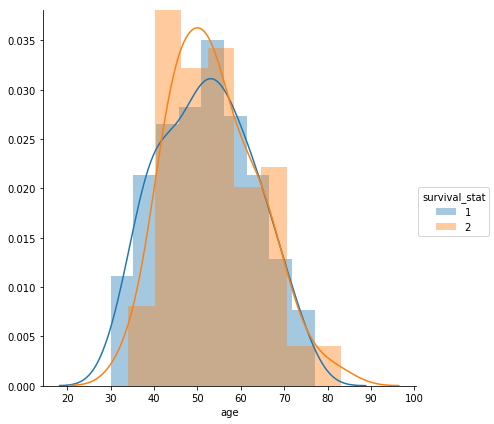

In [5]:
#First Considering age
#Could be one of the factors
sns.FacetGrid(haberman,hue='survival_stat',size=6) \
   .map(sns.distplot,'age')\
   .add_legend();
plt.show()

C:\Users\abhinssi.ORADEV\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\abhinssi.ORADEV\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


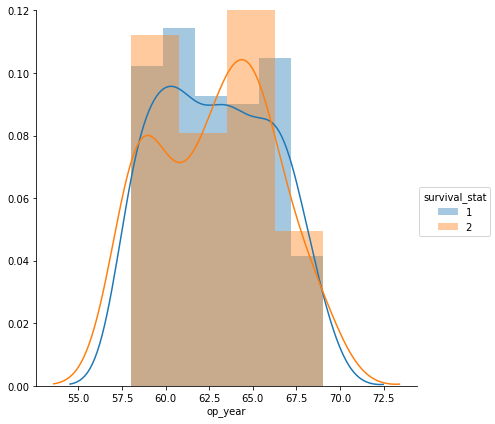

In [6]:
#Op_year or 'opeartion year'
sns.FacetGrid(haberman,hue='survival_stat',size=6) \
   .map(sns.distplot,'op_year')\
   .add_legend();
plt.show()

C:\Users\abhinssi.ORADEV\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\abhinssi.ORADEV\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


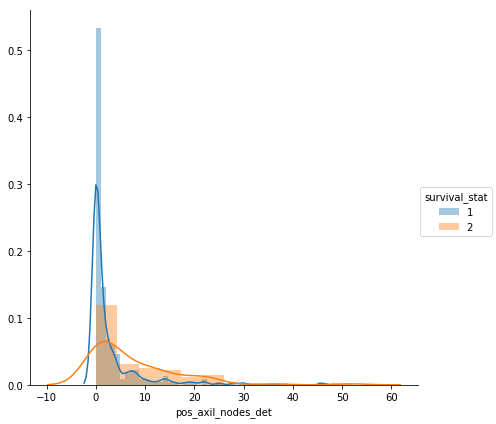

In [7]:
#Positve axillary Nodes
sns.FacetGrid(haberman,hue='survival_stat',size=6) \
   .map(sns.distplot,'pos_axil_nodes_det')\
   .add_legend();
plt.show()

#### Observations
  1. Not much sense could be make out of the 1-D plot of 'age' and 'op_year'. There is no clear seperation
  2. A patient with 0 cancerous axillary nodes post surgery has much higher likelihood of surviving beyond five years
  3. This likehood decreases as positive axillary nodes increases.
  4. The relative number of cases where patient doesn't survive becomes higher when the number of cancerous axillary nodes becomes greater than 5.

### PDF-CDF Plots

In [8]:
#Filtering according to class labels
habe_surv=haberman.loc[haberman.survival_stat == 1]
habe_not_surv=haberman.loc[haberman.survival_stat == 2]

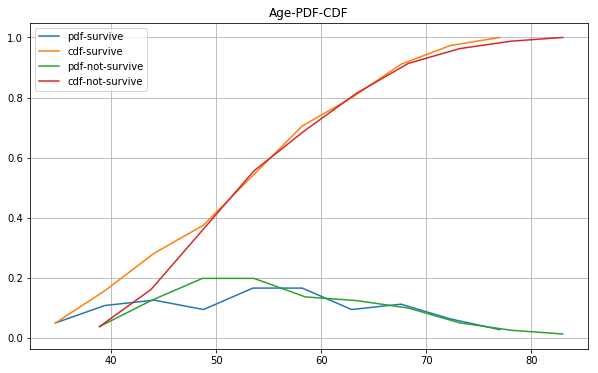

In [9]:
#Plots of CDF of age accoriding to class labels
co,bin_edges=np.histogram(habe_surv['age'],bins=10,density=True)
pdf=co/sum(co)
cdf=np.cumsum(pdf)
plt.figure(figsize=(10,6))
plt.title("Age-PDF-CDF")
plt.grid()
plt.plot(bin_edges[1:],pdf,label='pdf-survive')
plt.plot(bin_edges[1:], cdf,label='cdf-survive')

co,bin_edges=np.histogram(habe_not_surv['age'],bins=10,density=True)
pdf=co/sum(co)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='pdf-not-survive')
plt.plot(bin_edges[1:], cdf,label='cdf-not-survive')
plt.legend()
plt.show()

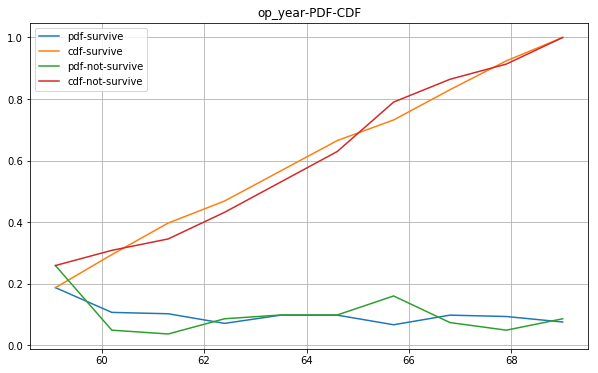

In [10]:
#Plots of CDF of op_year accoriding to class labels
co,bin_edges=np.histogram(habe_surv['op_year'],bins=10,density=True)
pdf=co/sum(co)
cdf=np.cumsum(pdf)
plt.figure(figsize=(10,6))
plt.title("op_year-PDF-CDF")
plt.grid()
plt.plot(bin_edges[1:],pdf,label='pdf-survive')
plt.plot(bin_edges[1:], cdf,label='cdf-survive')

co,bin_edges=np.histogram(habe_not_surv['op_year'],bins=10,density=True)
pdf=co/sum(co)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='pdf-not-survive')
plt.plot(bin_edges[1:], cdf,label='cdf-not-survive')
plt.legend()

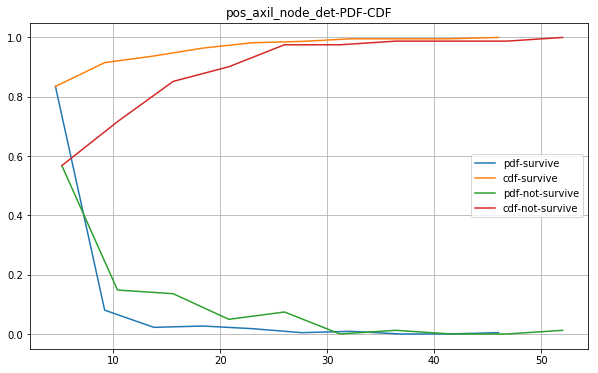

In [11]:
#Plots of CDF of pos_axil_nodes_det accoriding to class labels
co,bin_edges=np.histogram(habe_surv['pos_axil_nodes_det'],bins=10,density=True)
pdf=co/sum(co)
cdf=np.cumsum(pdf)
plt.figure(figsize=(10,6))
plt.title("pos_axil_node_det-PDF-CDF")
plt.grid()
plt.plot(bin_edges[1:],pdf,label='pdf-survive')
plt.plot(bin_edges[1:], cdf,label='cdf-survive')

co,bin_edges=np.histogram(habe_not_surv['pos_axil_nodes_det'],bins=10,density=True)
pdf=co/sum(co)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='pdf-not-survive')
plt.plot(bin_edges[1:], cdf,label='cdf-not-survive')
plt.legend()
plt.show()

#### Observations
  1. CDF curve for both survive and non-survive closely follow each other when attribute chosen is 'age'. There is slight difference for younger people.
  2. In case of 'op_year', there is a slight change in position when operation year=1965.
  3. From 1965 to late 1967, the probabilty of patient surving is less than that of not surviving (More specifically, at around late 1965, the cumaltive probabilty that patient would survive is around 76% while that of not surving is around 80%).
  4. Difference in cumaltive probabilties is wide when less positive axillary nodes are detected post surgerey. This margin decreases as the count goes up.

### Box-Plots & Violin Plots

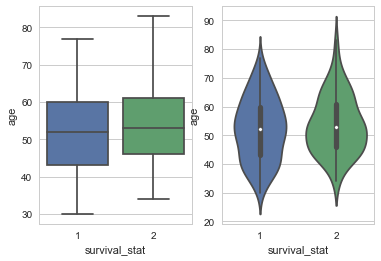

In [35]:
# Box Plots and Violin plots for further Univariate annalysis
sns.set(style='whitegrid')
plt.subplot(1,2,1)
sns.boxplot(data=haberman,x='survival_stat',y='age')

plt.subplot(1,2,2)
sns.violinplot(data=haberman,x='survival_stat',y='age')
plt.show()

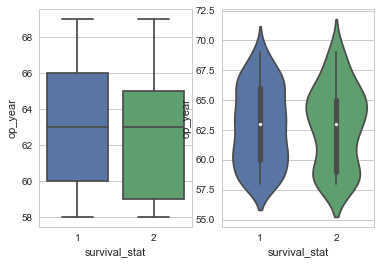

In [36]:
plt.subplot(1,2,1)
sns.boxplot(data=haberman,x='survival_stat',y='op_year')

plt.subplot(1,2,2)
sns.violinplot(data=haberman,x='survival_stat',y='op_year')
plt.show()

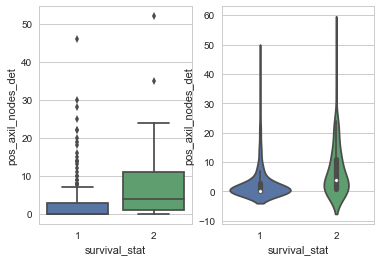

In [38]:
plt.subplot(1,2,1)
sns.boxplot(data=haberman,x='survival_stat',y='pos_axil_nodes_det')

plt.subplot(1,2,2)
sns.violinplot(data=haberman,x='survival_stat',y='pos_axil_nodes_det')
plt.show()

#### Observations
  1. The plots for 'pos_axil_nodes_det' suggests that most of the patients who have less than 4 (75th percentile) cancerous axillary nodes post surgery have survived beyond 5 years.
  2. This also overlaps with the fact that there are patients who have not survived beyond 5 years when there axillary node count was as low as 2.
  3. Its certain though beyond node count of 5 (50th percentile of non-surviving patients), the likelihood of patient not surviving is much more.
  4. There are many outliers observed in surviving patients data for pos_axil_nodes_det.
  5. Not much sense can be made from box-plots of 'age' and 'op_year' except for the fact that 'age' plot for surviving patients has more spread than that of non-surviving patients.

## Bivartiate Analysis

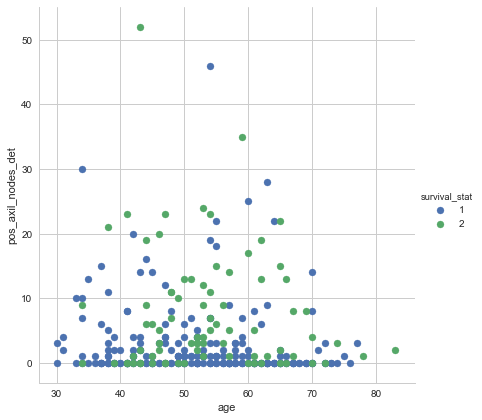

In [39]:
#First let's go with a simple scatter plot between age and pos_axil_nodes_det
sns.FacetGrid(haberman, hue="survival_stat", size=6) \
   .map(plt.scatter, "age", "pos_axil_nodes_det") \
   .add_legend();
plt.show();

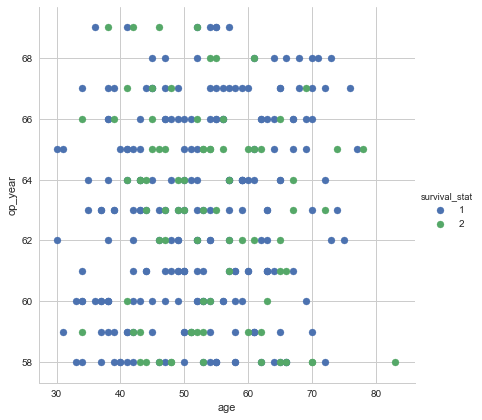

In [44]:
#scatter plot between age and op_year
sns.FacetGrid(haberman, hue="survival_stat", size=6) \
   .map(plt.scatter, "age", "op_year") \
   .add_legend();
plt.show();

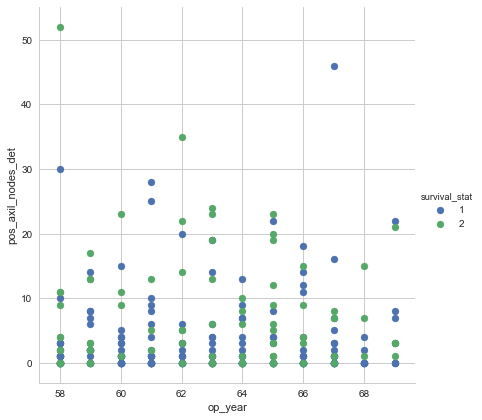

In [45]:
#Scatter plot between op_year and pos_axil_nodes_det
sns.FacetGrid(haberman, hue="survival_stat", size=6) \
   .map(plt.scatter, "op_year", "pos_axil_nodes_det") \
   .add_legend();
plt.show();

#### Observation
  1. Not much could can be concluded from thess plot. Its easy enough to say that the plot is not **linearly separable**.
  2. That is to say a simple straight line will not be able to classify between surviving and non-surviving patients

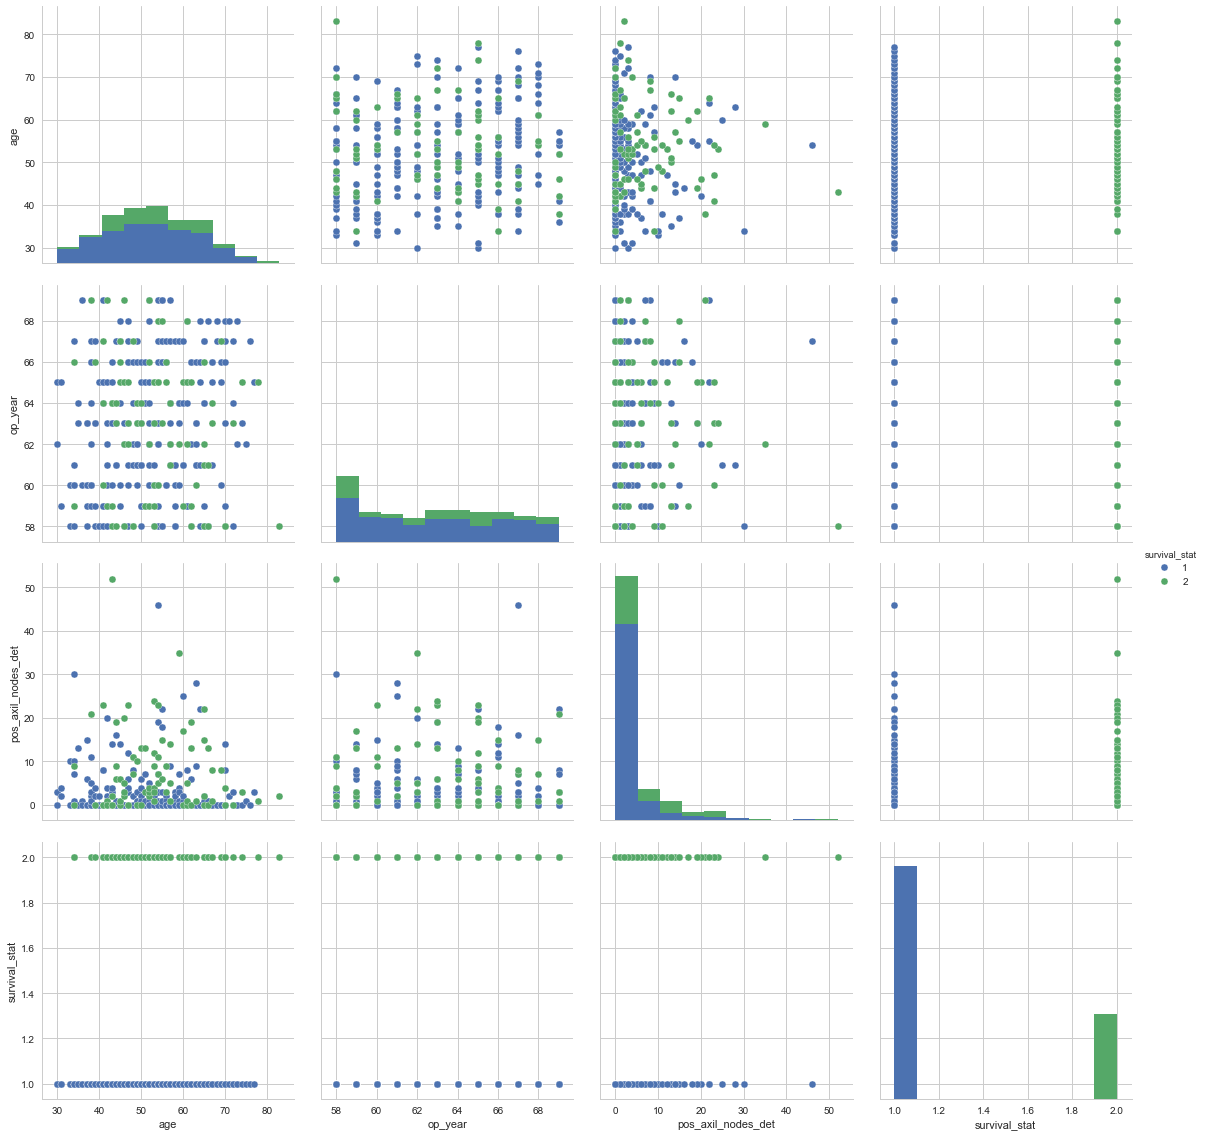

In [42]:
#Pair Plot
plt.close();
sns.set_style("whitegrid");
sns.pairplot(haberman, hue="survival_stat", size=4);
plt.show()

#### Observations
  1. Just like the scatter plots, not much could be said for pair plots as well
  2. A more complex classification algorithm would be needed.
  3. Care should be taken about the outliers as revealed in 'pos_axil_nodes_det' vs 'age' and 'pos_axil_nodes_det' vs 'op_year'.

## Summary/Conclusion
 1. Dataset is highly skewed with lot outliers present.
 2. Univariate analysis reveals that pos_axil_nodes is an important parameter to consider but not only one.
 3. Needless to say a simple IF-ELSE block won't be enough to classify the data.
 4. Bivariate analysis suggests a more complex classification algorithm would be needed to classify this dataset.